**This is the Jupyter Notebook for Applied ML Homework 1 by Soumyajyoti Bhattacharya. This notebook deals with using the IMDB Reviews dataset for figuring out the best Neural Network Architecture for sentiment classification labeled reviews**

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding

Using TensorFlow backend.


Loading and preprocessing and looking at the data : 

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
X = np.concatenate((training_data, testing_data), axis=0)
Y = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 effect = np.zeros((len(sequences), dimension))
 for i, j in enumerate(sequences):
  effect[i, j] = 1
 return effect

In [9]:
print("Categories:", np.unique(Y))
print("Number of unique words:", len(np.unique(np.hstack(X))))
length = [len(i) for i in X]
print("Average Review Size:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review Size: 234.75892
Standard Deviation: 173.0


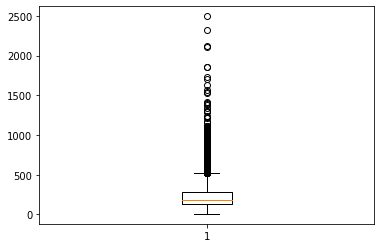

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(length)
plt.show()

Then break the dataset into training and testing sets:

In [13]:
dataset = vectorize(X)
testset = np.array(Y).astype("float32")
x_test = dataset[:10000]
y_test = testset[:10000]
x_train = dataset[10000:]
print(x_train.shape)
y_train = testset[10000:]
print(y_train.shape)

(40000, 10000)
(40000,)


In [ ]:
from keras.callbacks import History 
history = History()

In [15]:
model = models.Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = "sgd",  metrics = ["accuracy"])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 500,101
Trainable params: 500,101
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Build a basic Neural Network for the dataset labels on 10 epochs and 500 batch size:

In [22]:
results = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 500,
 validation_data = (x_test, y_test),
 callbacks=[history]
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 139us/step - loss: 0.6920 - acc: 0.5230 - val_loss: 0.6902 - val_acc: 0.5564
Epoch 2/10
40000/40000 [==============================] - 5s 128us/step - loss: 0.6891 - acc: 0.5546 - val_loss: 0.6859 - val_acc: 0.6115
Epoch 3/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.6844 - acc: 0.5907 - val_loss: 0.6786 - val_acc: 0.6653
Epoch 4/10
40000/40000 [==============================] - 5s 128us/step - loss: 0.6768 - acc: 0.6249 - val_loss: 0.6669 - val_acc: 0.7051
Epoch 5/10
40000/40000 [==============================] - 5s 127us/step - loss: 0.6655 - acc: 0.6547 - val_loss: 0.6490 - val_acc: 0.7419
Epoch 6/10
40000/40000 [==============================] - 5s 126us/step - loss: 0.6488 - acc: 0.6812 - val_loss: 0.6239 - val_acc: 0.7659
Epoch 7/10
40000/40000 [==============================] - 5s 127us/step - loss: 0.6269 - acc: 0.7051 - val_loss: 0.5925 - 

In [23]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 100us/step
Test score: 0.4799152235984802
Test accuracy: 0.8163


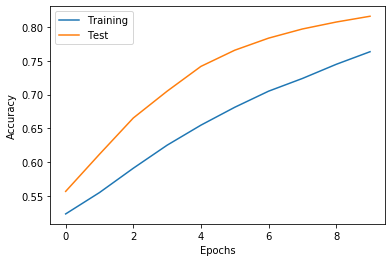

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Test'])

Add more complex layers to the initial neural network then hyperparameter optimize batch size:

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
model = Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(50, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "sgd",  metrics = ["accuracy"])

In [26]:
a = [500,1000,10000]
for i in a:
  results = model.fit(x_train, y_train, epochs= 10, batch_size = i, validation_data = (x_test, y_test), callbacks=[history])
  score = model.evaluate(x_test, y_test, verbose=1)
  print("Test score:", score[0])
  print('Test accuracy:', score[1])
  # plt.plot(history.history['acc'])
  # plt.plot(history.history['val_acc'])
  # plt.xlabel('Epochs')
  # plt.ylabel('Accuracy')
  # plt.legend(['Training','Test'])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 134us/step - loss: 0.1899 - acc: 0.9312 - val_loss: 0.2752 - val_acc: 0.8897
Epoch 2/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.1908 - acc: 0.9309 - val_loss: 0.2754 - val_acc: 0.8911
Epoch 3/10
40000/40000 [==============================] - 5s 129us/step - loss: 0.1873 - acc: 0.9310 - val_loss: 0.2763 - val_acc: 0.8911
Epoch 4/10
40000/40000 [==============================] - 5s 133us/step - loss: 0.1855 - acc: 0.9322 - val_loss: 0.2768 - val_acc: 0.8915
Epoch 5/10
40000/40000 [==============================] - 5s 132us/step - loss: 0.1834 - acc: 0.9343 - val_loss: 0.2762 - val_acc: 0.8889
Epoch 6/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.1798 - acc: 0.9355 - val_loss: 0.2788 - val_acc: 0.8914
Epoch 7/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.1790 - acc: 0.9352 - val_loss: 0.2779 - 

Our best case scenario here is of batch size 500

In [ ]:
def printstuff(a,b):
  plt.plot(a)
  plt.plot(b)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Training','Test'])

In [34]:
for i in [2,10,20]:  
  history = model.fit(x_train, y_train, epochs= i, batch_size = 500, validation_data = (x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=1)
  print("Test score:", score[0])
  print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 5s 133us/step - loss: 0.1133 - acc: 0.9627 - val_loss: 0.3097 - val_acc: 0.8875
Epoch 2/2
10000/10000 [==============================] - 1s 102us/step
Test score: 0.3093030282020569
Test accuracy: 0.8896
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 131us/step - loss: 0.1100 - acc: 0.9633 - val_loss: 0.3097 - val_acc: 0.8889
Epoch 2/10
40000/40000 [==============================] - 5s 133us/step - loss: 0.1110 - acc: 0.9642 - val_loss: 0.3101 - val_acc: 0.8876
Epoch 3/10
40000/40000 [==============================] - 5s 132us/step - loss: 0.1096 - acc: 0.9646 - val_loss: 0.3118 - val_acc: 0.8886
Epoch 4/10
40000/40000 [==============================] - 5s 131us/step - loss: 0.1084 - acc: 0.9653 - val_loss: 0.3109 - val_acc: 0.8889
Epoch 5/10
40000/40000 [==============================] - 5s 131us/step - loss: 0.1072 

In [42]:
results = model.fit(x_train, y_train, epochs= 20, batch_size = 500, validation_data = (x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 5s 134us/step - loss: 0.6474 - acc: 0.6719 - val_loss: 0.6266 - val_acc: 0.7438
Epoch 2/20
40000/40000 [==============================] - 5s 137us/step - loss: 0.6227 - acc: 0.7098 - val_loss: 0.5929 - val_acc: 0.7707
Epoch 3/20
40000/40000 [==============================] - 5s 135us/step - loss: 0.5930 - acc: 0.7352 - val_loss: 0.5549 - val_acc: 0.7956
Epoch 4/20
40000/40000 [==============================] - 5s 135us/step - loss: 0.5594 - acc: 0.7602 - val_loss: 0.5155 - val_acc: 0.8094
Epoch 5/20
40000/40000 [==============================] - 5s 135us/step - loss: 0.5261 - acc: 0.7741 - val_loss: 0.4789 - val_acc: 0.8186
Epoch 6/20
40000/40000 [==============================] - 5s 133us/step - loss: 0.4963 - acc: 0.7862 - val_loss: 0.4456 - val_acc: 0.8277
Epoch 7/20
40000/40000 [==============================] - 5s 135us/step - loss: 0.4695 - acc: 0.8018 - val_loss: 0.4197 - 

Then we hyperparameter optimize epochs and finally visualize it

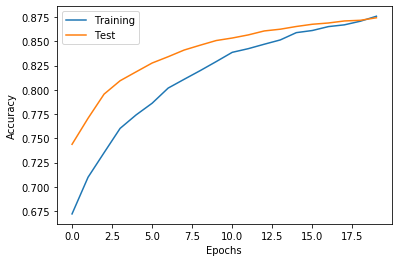

In [43]:
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Training','Test'])